In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [48]:
# tendencia - direçao
# sazonalidade - recorrência das oscilações
# resíduo - o que sobra do sinal

In [49]:
df_path = 'https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv'

In [50]:
df = pd.read_csv(df_path, parse_dates=[0], index_col=['DATE'])

In [51]:
df.head(3)

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


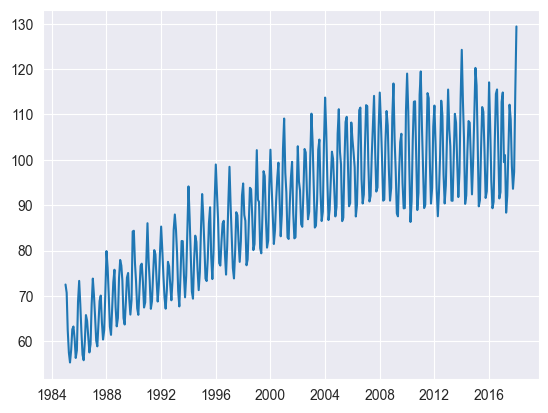

In [53]:
plt.plot(df.index, df['Value'])

In [54]:
resultados = seasonal_decompose(df)

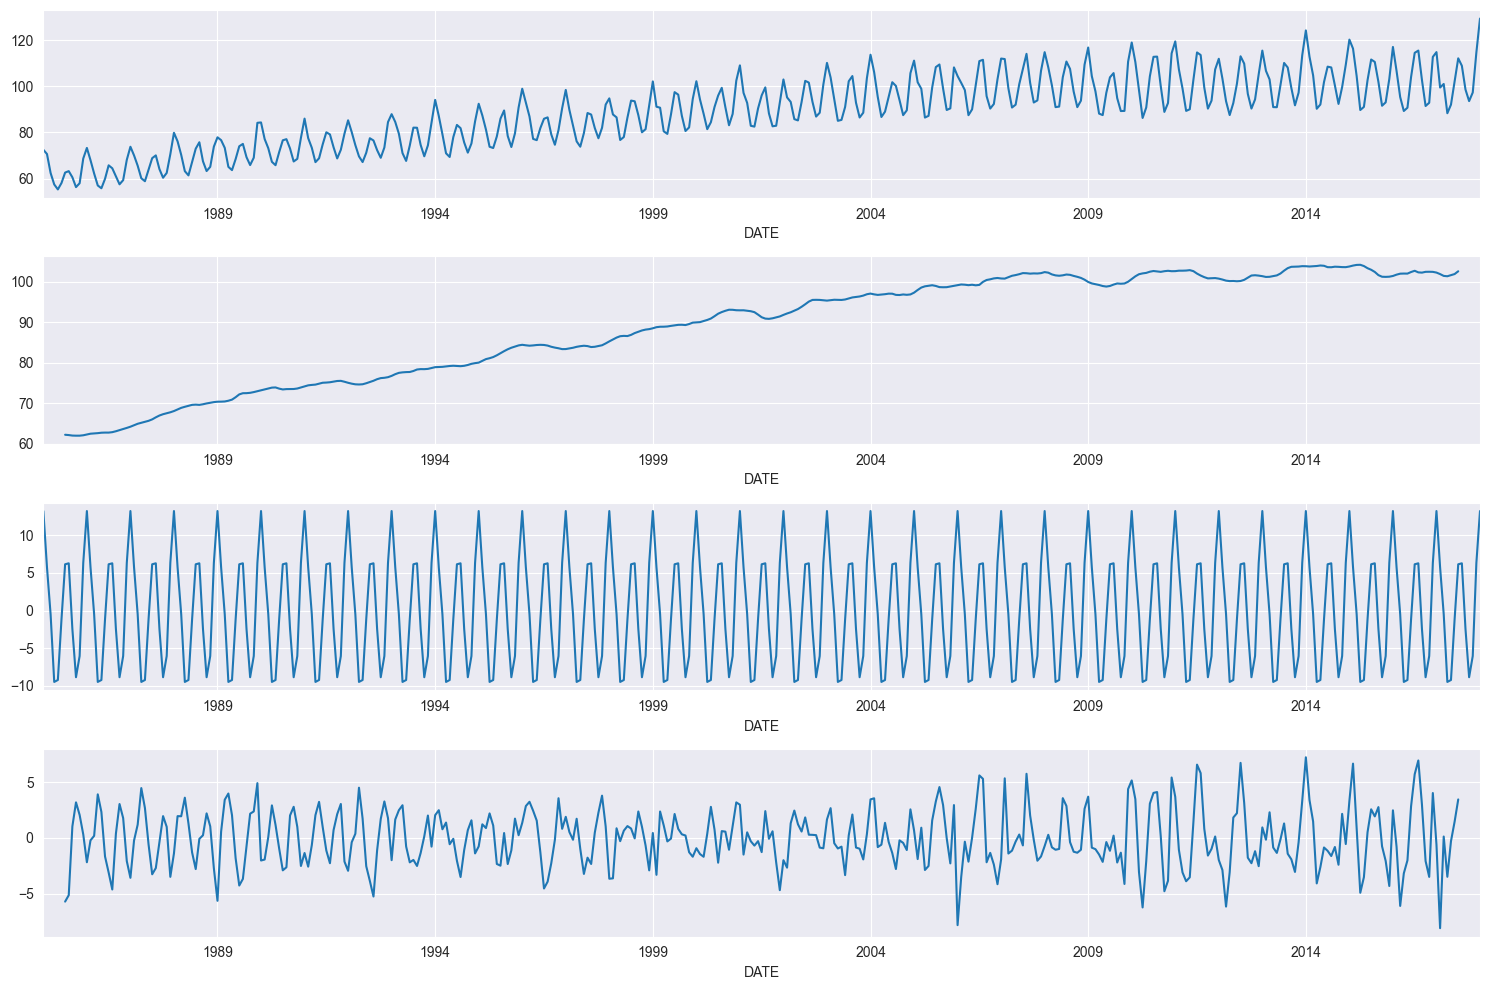

In [55]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [56]:
# Estacionaria ou nao estacionaria

# ADF - Augmented Dickey Fuller

# H0 - Hipótese Nula (não é estacionária)
# H1 - Hipotese Alternatica (rejeição da hipótese nula)

# p - value = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

In [57]:
sns.set_style('darkgrid')

In [58]:
x = df['Value'].values

In [59]:
result = adfuller(x)

print('Teste ADF')
print(f'Teste Estatistico: {result[0]}')
print(f'P-value: {result[1]}')
print(f'Valores críticos: ')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste Estatistico: -2.25699035004725
P-value: 0.18621469116586592
Valores críticos: 
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


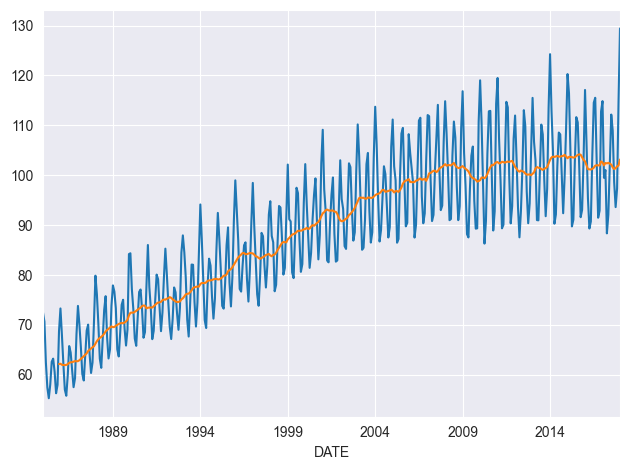

In [60]:
ma = df.rolling(12).mean()

figure, ax = plt.subplots()

df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False)

plt.tight_layout()

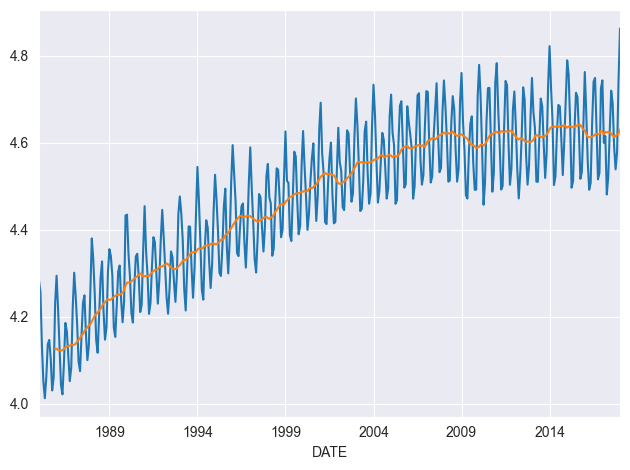

In [61]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

figure, ax = plt.subplots()

df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False)

plt.tight_layout()

In [62]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

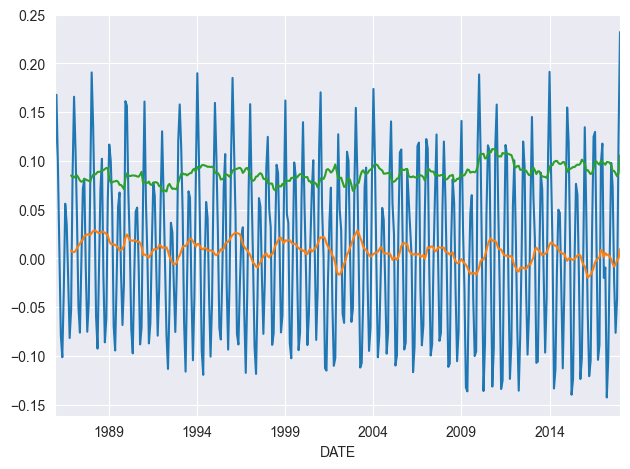

In [63]:
figure, ax = plt.subplots()

df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False)
std.plot(ax=ax, legend=False)

plt.tight_layout()

In [64]:
x_s = df_s['Value'].values
result_s = adfuller(x_s)

print('Teste ADF')
print(f'Teste Estatistico: {result_s[0]}')
print(f'P-value: {result_s[1]}')
print(f'Valores críticos: ')

for key, value in result_s[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste Estatistico: -5.211586185365426
P-value: 8.325639759946677e-06
Valores críticos: 
	1%: -3.448147967010838
	5%: -2.8693833397824413
	10%: -2.5709483564645725


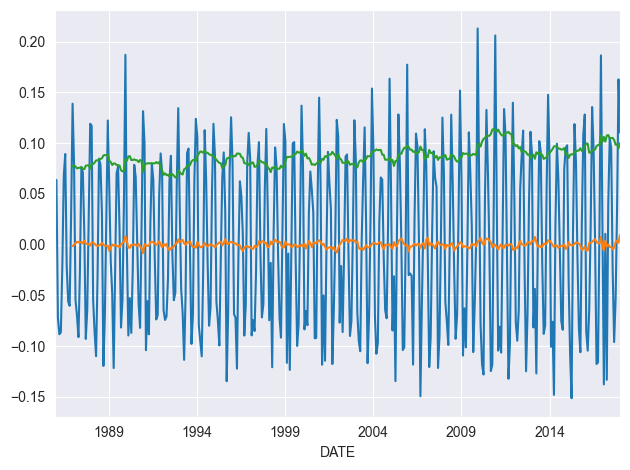

In [65]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()

std_diff = df_diff.rolling(12).std()

figure, ax = plt.subplots()

df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False)
std_diff.plot(ax=ax, legend=False)

plt.tight_layout()

In [66]:
x_diff = df_diff['Value'].dropna().values
result_diff = adfuller(x_diff)

print('Teste ADF')
print(f'Teste Estatistico: {result_diff[0]}')
print(f'P-value: {result_diff[1]}')
print(f'Valores críticos: ')

for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste Estatistico: -7.651129568145156
P-value: 1.788126735435908e-11
Valores críticos: 
	1%: -3.448294490928673
	5%: -2.869447722240253
	10%: -2.570982681065269


In [67]:
# ARIMA  - (AR): Autoregressivo, I: Integrado, MA: Moving Average

# A(x, y, z) - ACF, PACF

In [68]:
lag_acf = acf(df_diff.dropna(), nlags=25)

lag_pacf = pacf(df_diff.dropna(), nlags=25)

In [69]:
# 5% ACF

# 1.96/sqrt(N-d) -> N - numero de pontos do df, D - numero de vezes que nos diferenciamos o df

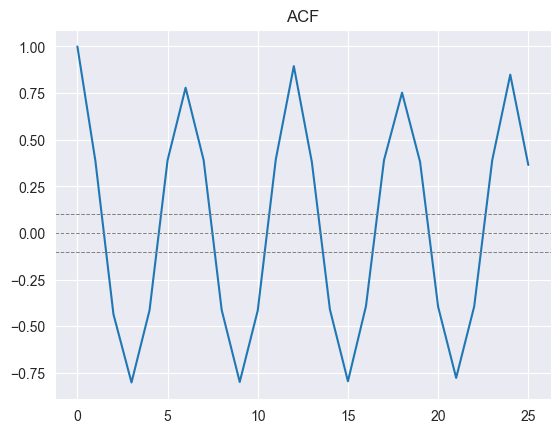

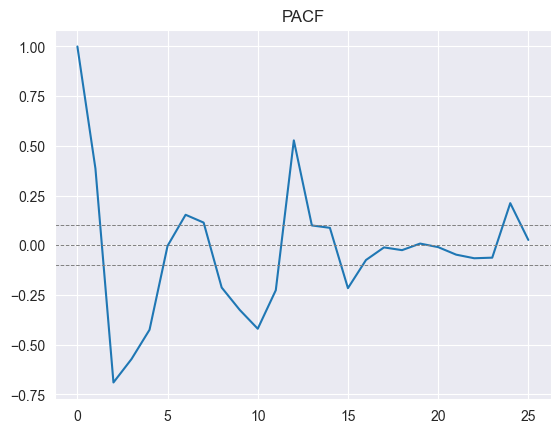

In [70]:
plt.plot(lag_acf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y= 0/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)

plt.title('ACF')

plt.show()

plt.plot(lag_pacf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y= 0/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)

plt.title('PACF')

plt.show()


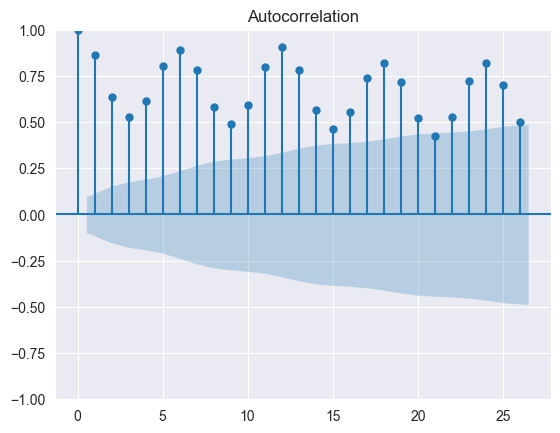

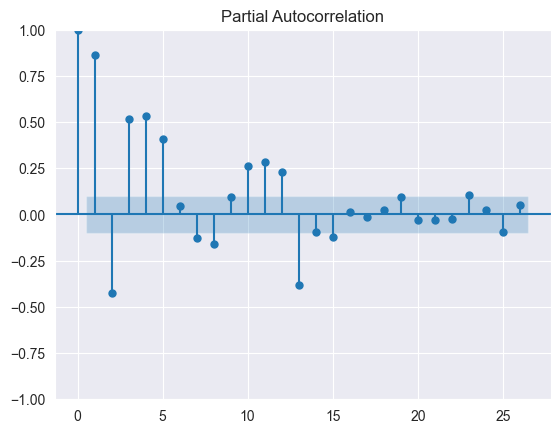

In [71]:
plot_acf(df['Value'])
plot_pacf(df['Value'])
plt.show()

Modelando Forecasting

In [72]:
df_novo = pd.read_csv(r'D:\Documentos\FIAP - Pos Tech Data Analytics\Aulas\Fase 2\Dados\train.csv', index_col='id', parse_dates=['date'])

In [73]:
df_novo

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


In [74]:
df_novo.shape

(3000888, 5)

In [75]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 137.4+ MB


In [76]:
df_novo['store_nbr'].nunique()

54

In [77]:
df_1 = df_novo.loc[df_novo['store_nbr'] == 1, ['date', 'family', 'sales']]
df_1 = df_1.rename(columns={'date':'ds', 'sales':'y', 'family':'unique_id'})

In [78]:
df_1

,ds,unique_id,y
id,,,
0,2013-01-01,AUTOMOTIVE,0.000000
1,2013-01-01,BABY CARE,0.000000
2,2013-01-01,BEAUTY,0.000000
3,2013-01-01,BEVERAGES,0.000000
4,2013-01-01,BOOKS,0.000000
...,...,...,...
2999134,2017-08-15,POULTRY,234.892000
2999135,2017-08-15,PREPARED FOODS,42.822998
2999136,2017-08-15,PRODUCE,2240.230000


In [79]:
train = df_1.loc[df_1['ds'] < '2014-01-01']
valid = df_1.loc[(df_1['ds'] >= '2014-01-01') & (df_1['ds'] < '2014-04-01')]
h = valid['ds'].nunique()

In [80]:
h

90

In [81]:
def wmape(y_true, y_pred):
    return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [82]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA
from statsforecast.utils import ConformalIntervals

c:\Users\Igor\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 57.50%


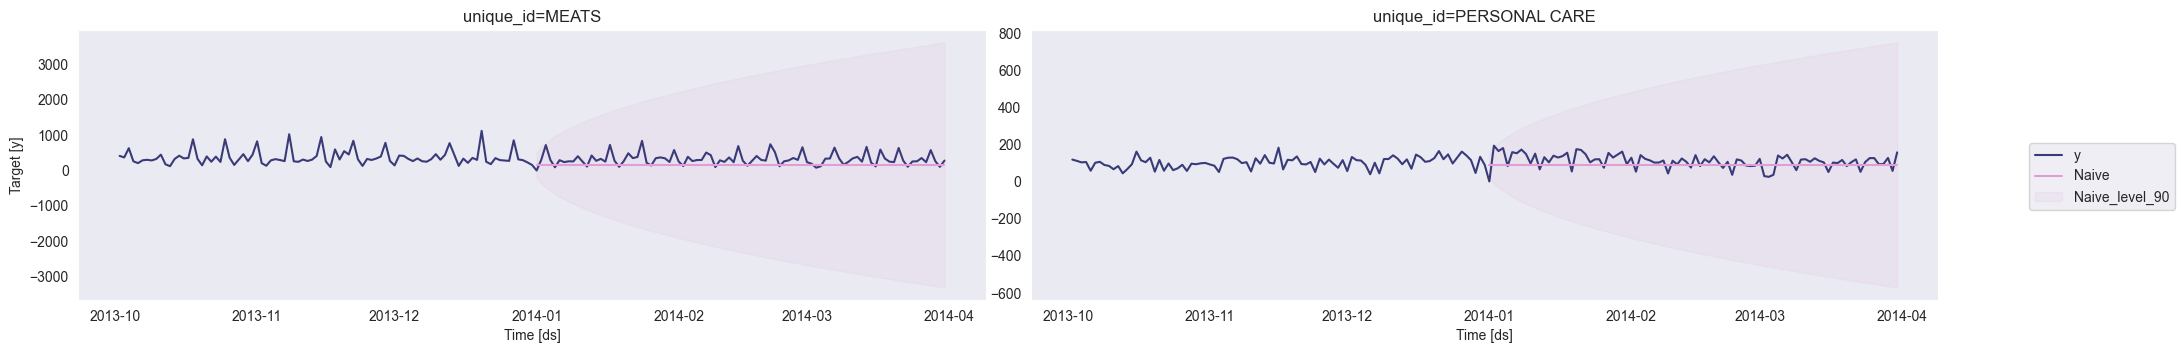

In [83]:
model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
model.fit(train)

forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape1 = wmape(forecast_df['y'].values, forecast_df['Naive'].values)
print(f'WMAPE: {wmape1:.2%}')

model.plot(train, forecast_df, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'], engine='matplotlib', max_insample_length=90)

In [84]:
forecast_df

,unique_id,ds,Naive,Naive-lo-90,Naive-hi-90,y
0,AUTOMOTIVE,2014-01-01,2.000,-2.671534,6.671534,0.0000
1,AUTOMOTIVE,2014-01-02,2.000,-4.606546,8.606546,3.0000
2,AUTOMOTIVE,2014-01-03,2.000,-6.091333,10.091333,0.0000
3,AUTOMOTIVE,2014-01-04,2.000,-7.343067,11.343067,0.0000
4,AUTOMOTIVE,2014-01-05,2.000,-8.445867,12.445867,1.0000
...,...,...,...,...,...,...
2965,SEAFOOD,2014-03-27,13.933,-181.675537,209.541534,31.3880
2966,SEAFOOD,2014-03-28,13.933,-182.809509,210.675507,63.2869
2967,SEAFOOD,2014-03-29,13.933,-183.936981,211.802979,33.6150
2968,SEAFOOD,2014-03-30,13.933,-185.058060,212.924057,18.3520


c:\Users\Igor\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 50.91%


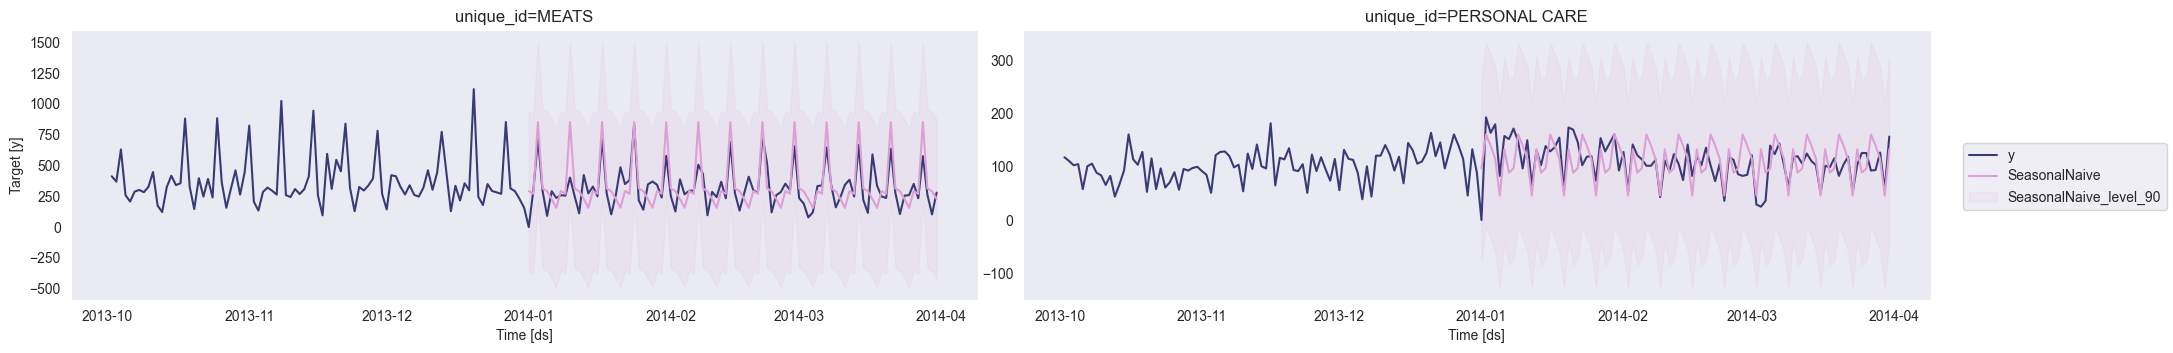

In [85]:
model_s = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
model_s.fit(train)

forecast_dfs = model_s.predict(h=h, level=[90])
forecast_dfs = forecast_dfs.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape2 = wmape(forecast_dfs['y'].values, forecast_dfs['SeasonalNaive'].values)
print(f'WMAPE: {wmape2:.2%}')

model_s.plot(train, forecast_dfs, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'], engine='matplotlib', max_insample_length=90)

In [86]:
forecast_dfs

,unique_id,ds,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,y
0,AUTOMOTIVE,2014-01-01,1.000000,-15.373032,17.373032,0.0000
1,AUTOMOTIVE,2014-01-02,2.000000,-14.373032,18.373032,3.0000
2,AUTOMOTIVE,2014-01-03,6.000000,-10.373032,22.373032,0.0000
3,AUTOMOTIVE,2014-01-04,4.000000,-12.373032,20.373032,0.0000
4,AUTOMOTIVE,2014-01-05,0.000000,-16.373032,16.373032,1.0000
...,...,...,...,...,...,...
2965,SEAFOOD,2014-03-27,26.622999,-30.028111,83.274109,31.3880
2966,SEAFOOD,2014-03-28,22.541000,-34.110111,79.192108,63.2869
2967,SEAFOOD,2014-03-29,19.537001,-37.114109,76.188110,33.6150
2968,SEAFOOD,2014-03-30,7.108000,-49.543110,63.759109,18.3520


c:\Users\Igor\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 53.02%


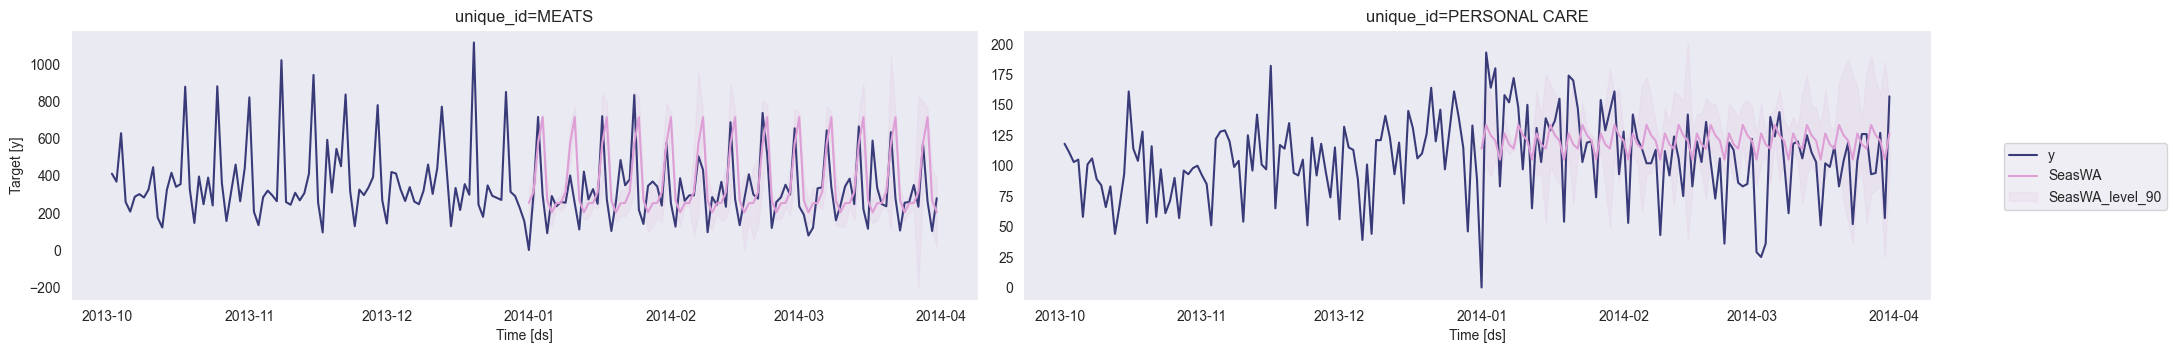

In [87]:
intervals = ConformalIntervals(h=h, n_windows=2)

model_sm = StatsForecast(models=[SeasonalWindowAverage(season_length=7, window_size=2, prediction_intervals=intervals)], freq='D', n_jobs=-1)
model_sm.fit(train)

forecast_dfsm = model_sm.predict(h=h, level=[90])
forecast_dfsm = forecast_dfsm.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape3 = wmape(forecast_dfsm['y'].values, forecast_dfsm['SeasWA'].values)
print(f'WMAPE: {wmape3:.2%}')

model_sm.plot(train, forecast_dfsm, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'], engine='matplotlib', max_insample_length=90)

c:\Users\Igor\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 56.34%


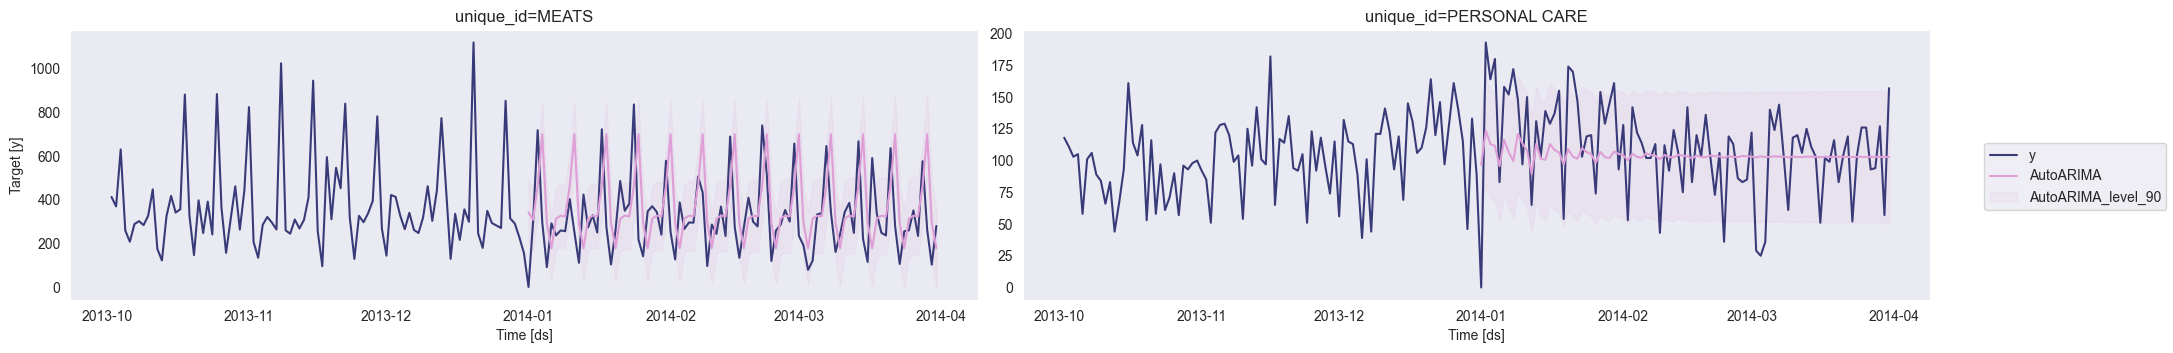

In [88]:
#ARIMA - AR: olha para as vendas do passado e acha uma correlação futura
# I - quantidade que a série foi diferenciada/ MA: Média Móvel
model_a = StatsForecast(models=[AutoARIMA(season_length=7)], freq='D', n_jobs=-1)
model_a.fit(train)

forecast_dfa = model_a.predict(h=h, level=[90])
forecast_dfa = forecast_dfa.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape4 = wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(train, forecast_dfa, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'],engine ='matplotlib', max_insample_length=90)